# Sensor Body Frame Registration 2 (cont'd)

V&V of the static registration zones!

Using the new architecture, import short and long session data to fine tune the coarse and fine ranges for still motion/lift peak. 

## Steps

1. decode all device data
2. compute processed signals for tile
3. create continuous tile euler signals to correct zero crossing errors affecting future stillness calcs
4. run a coarse detection for lift peak zones
5. run a fine still detection to identify any valid registration zones
6. compute the avg quaternion inside these fine zones to transform sensor into boot frame
7. assign all static registrations with timestamps (tail of zone) and associated ranges

To get valid boot orientations throughout the session, grab the most recent static registration to transform the sensor orientation signals.

In [1]:
from sessions import Session_2023_12_30, Session_2023_12_31

In [2]:
session_2023_12_30 = Session_2023_12_30()
session_2023_12_31 = Session_2023_12_31()

fine_rs: [[93927, 96032], [161887, 170666]]
coarse_rs: [[91983, 97773], [153949, 171279]]


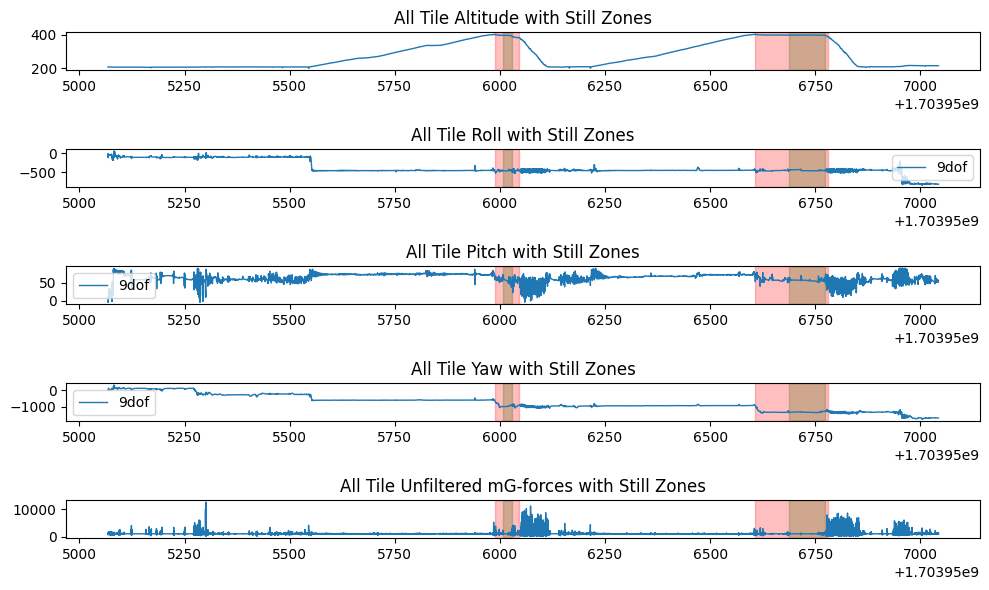

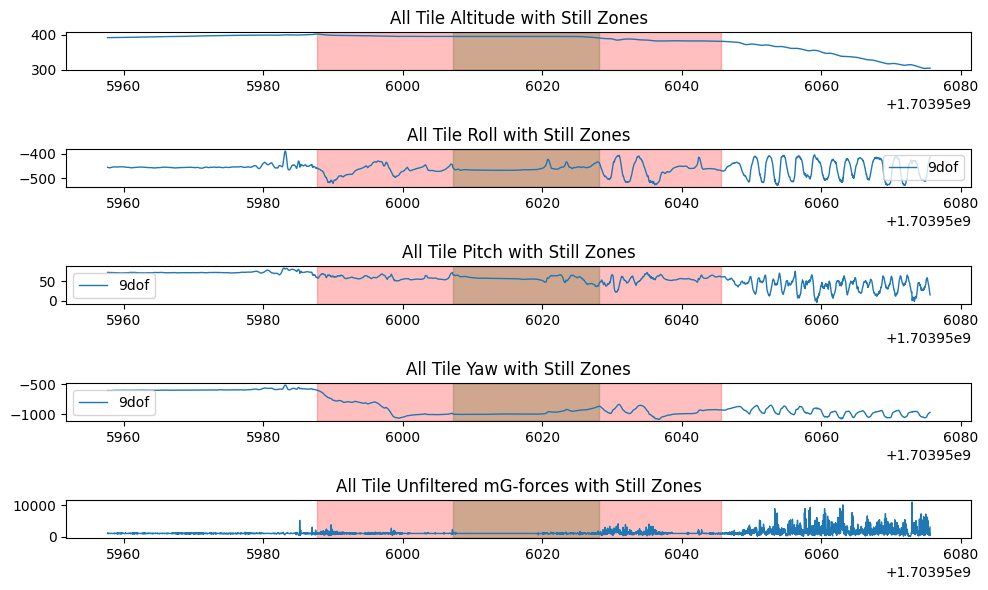

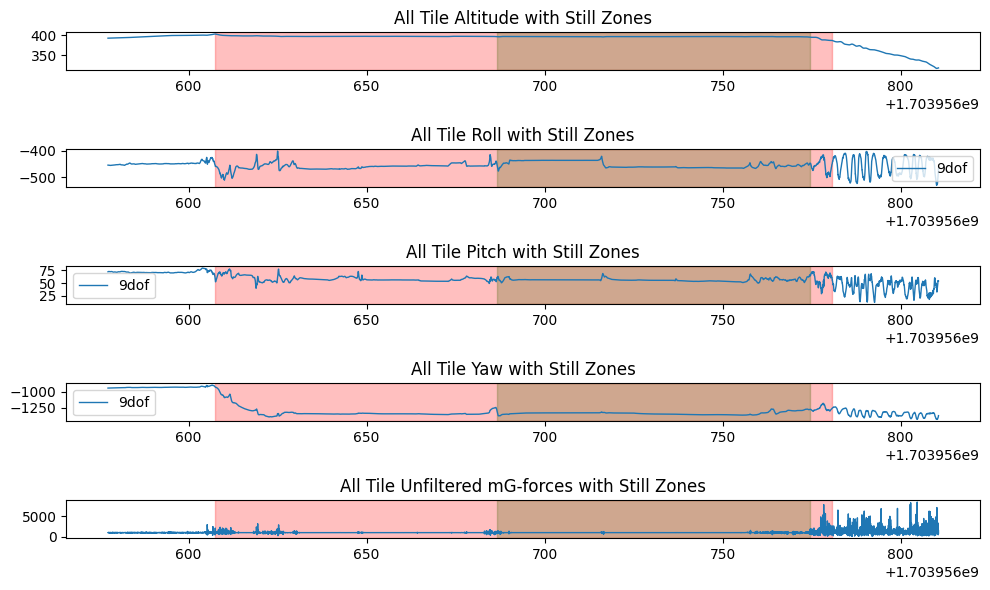

In [3]:
from plotting import plotAllTileRegistationZones

fine_rs = [r for r in session_2023_12_30.tile.static_registration.ranges if r is not None]
coarse_rs = session_2023_12_30.tile.static_registration.coarse_ranges
print('fine_rs:', fine_rs)
print('coarse_rs:', coarse_rs)

plotAllTileRegistationZones(session_2023_12_30.tile)

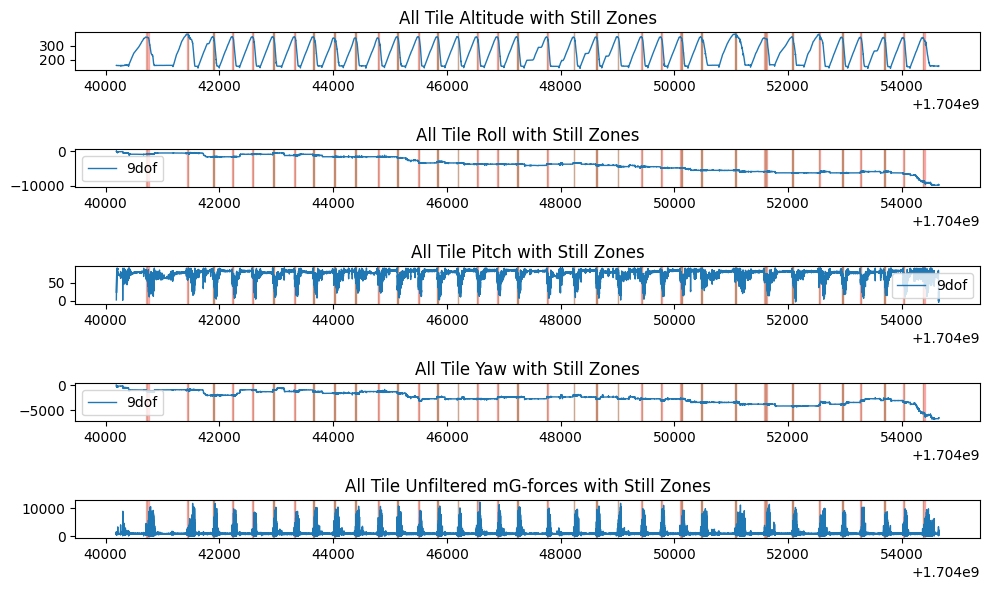

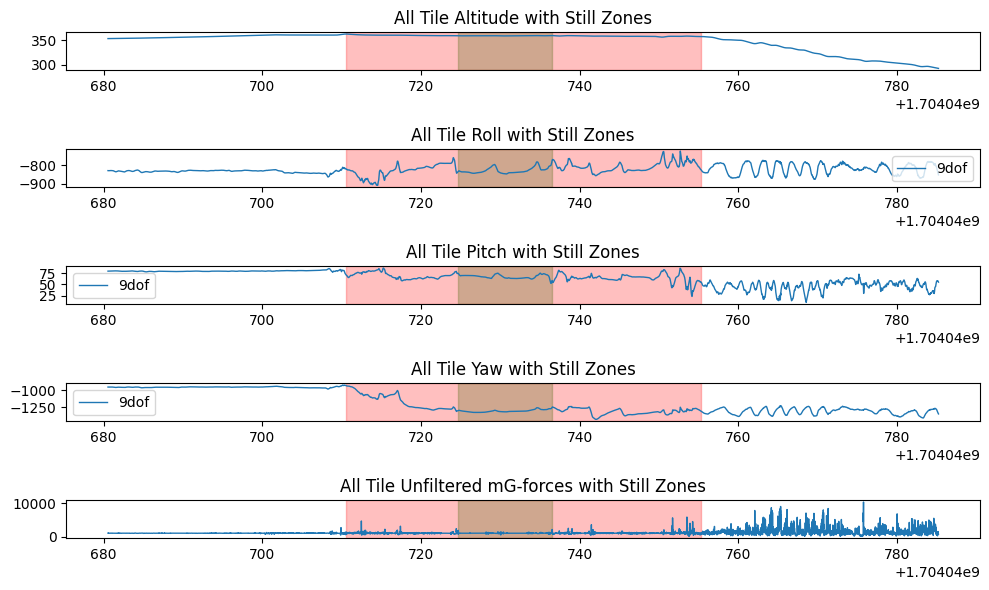

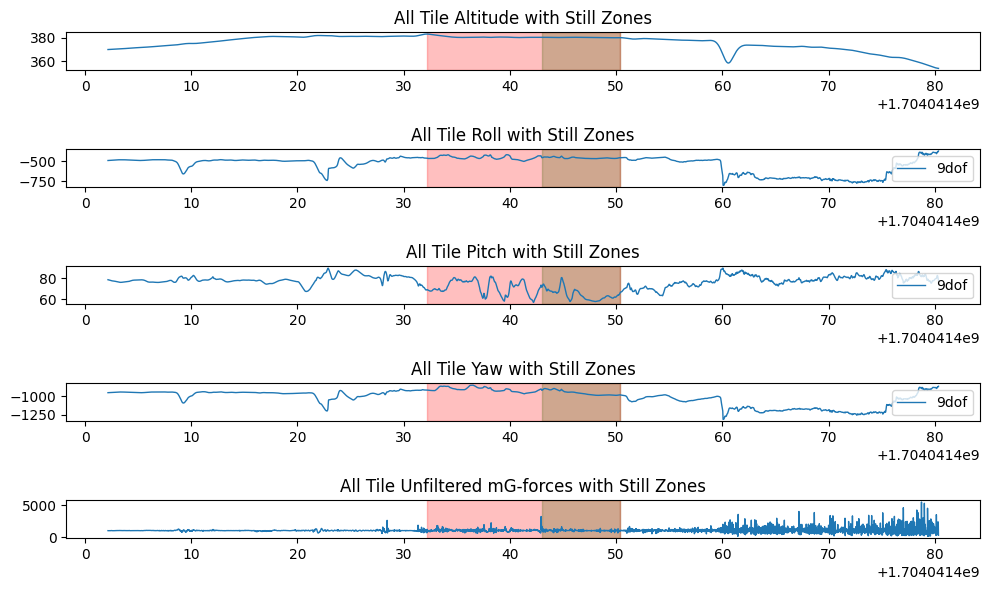

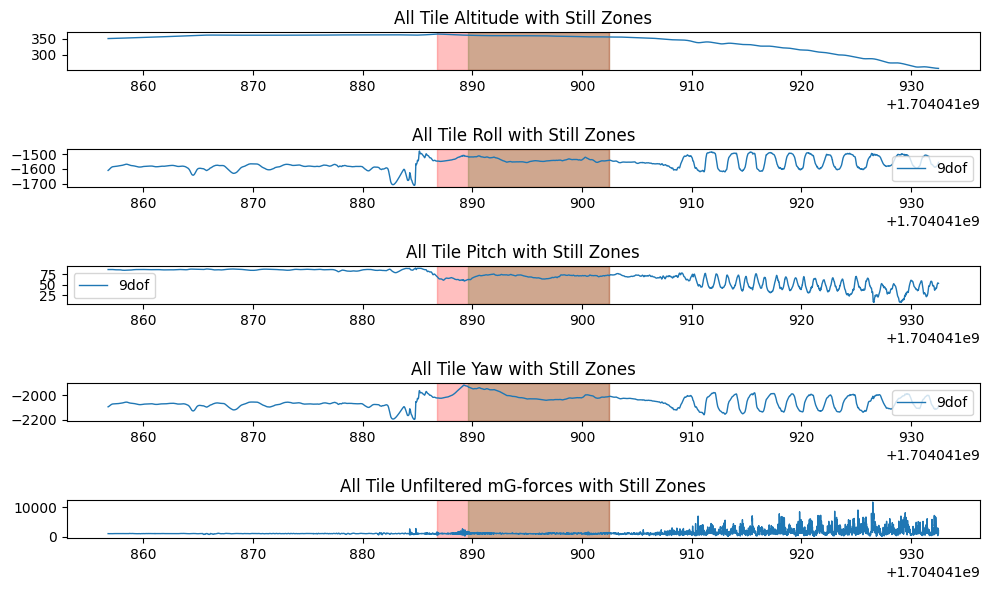

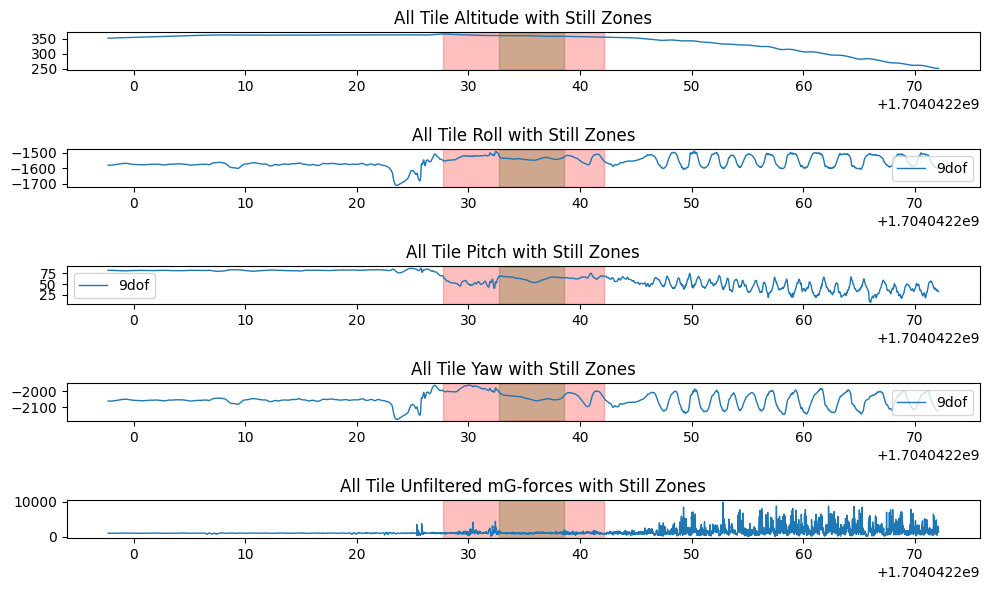

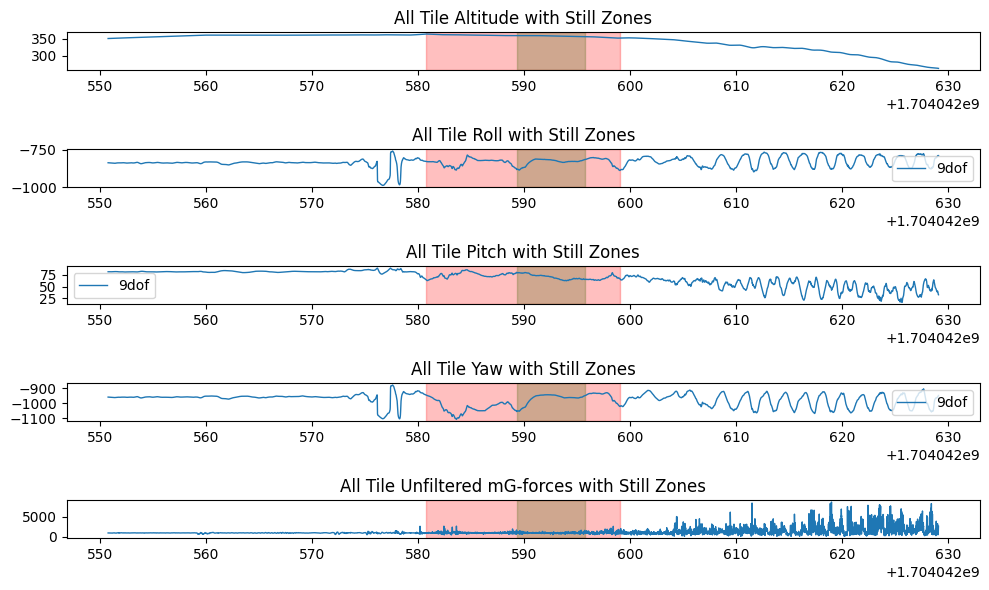

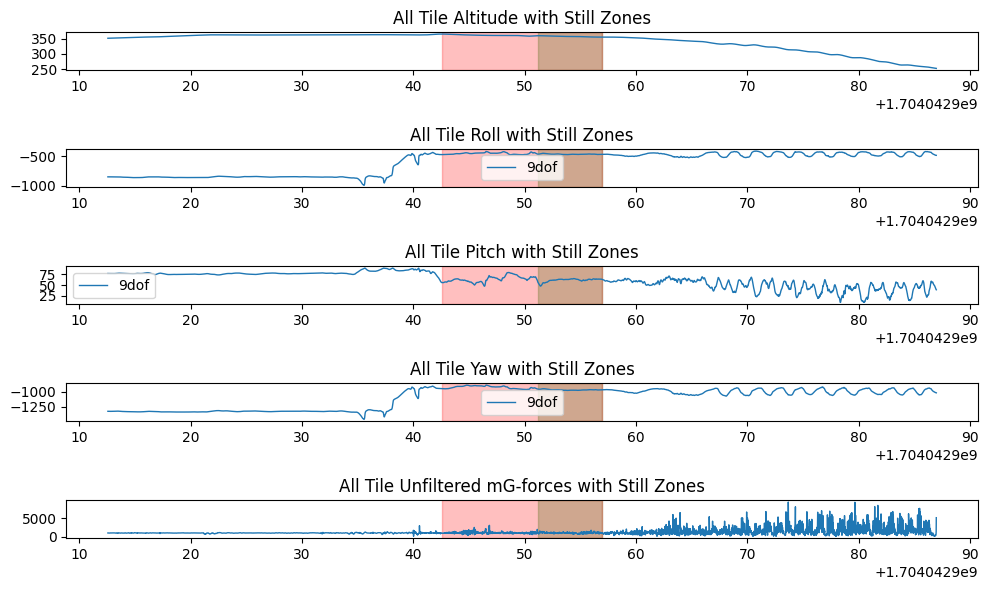

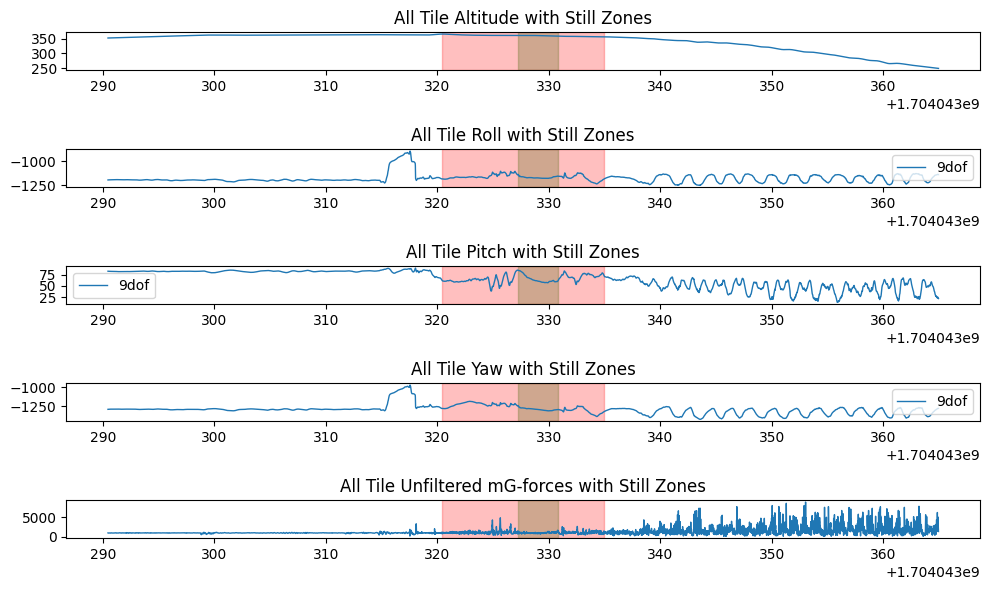

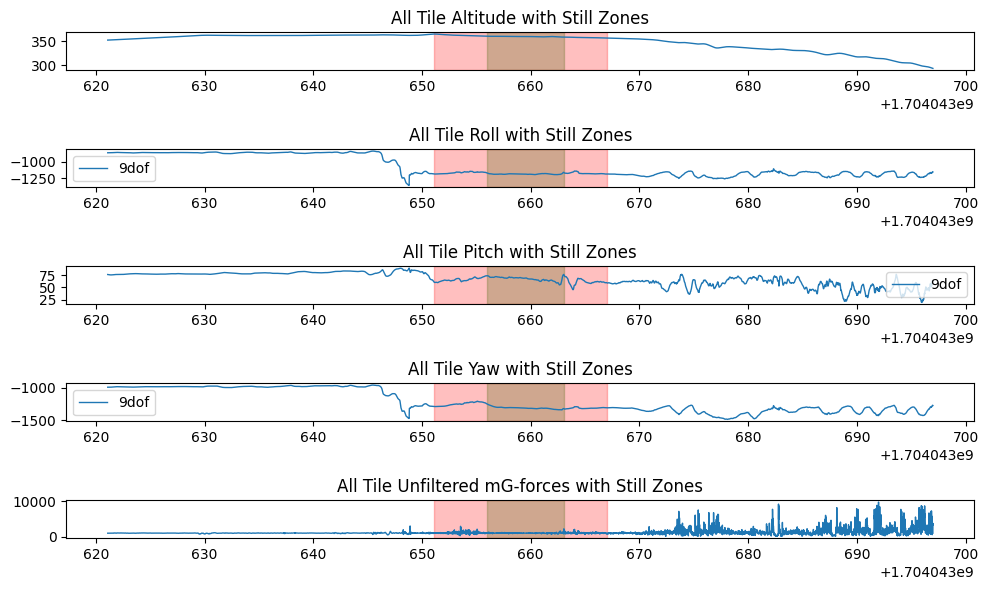

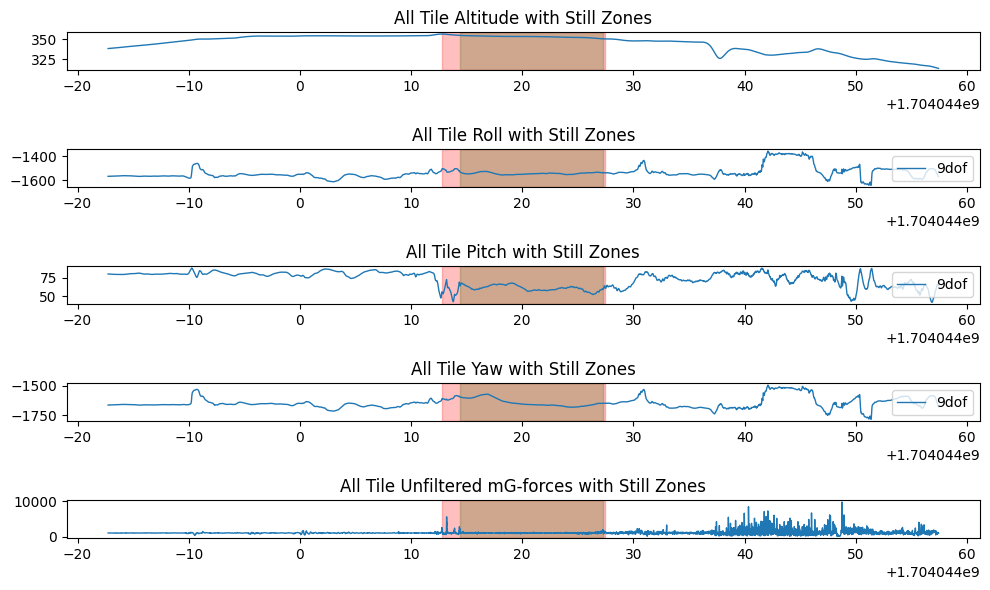

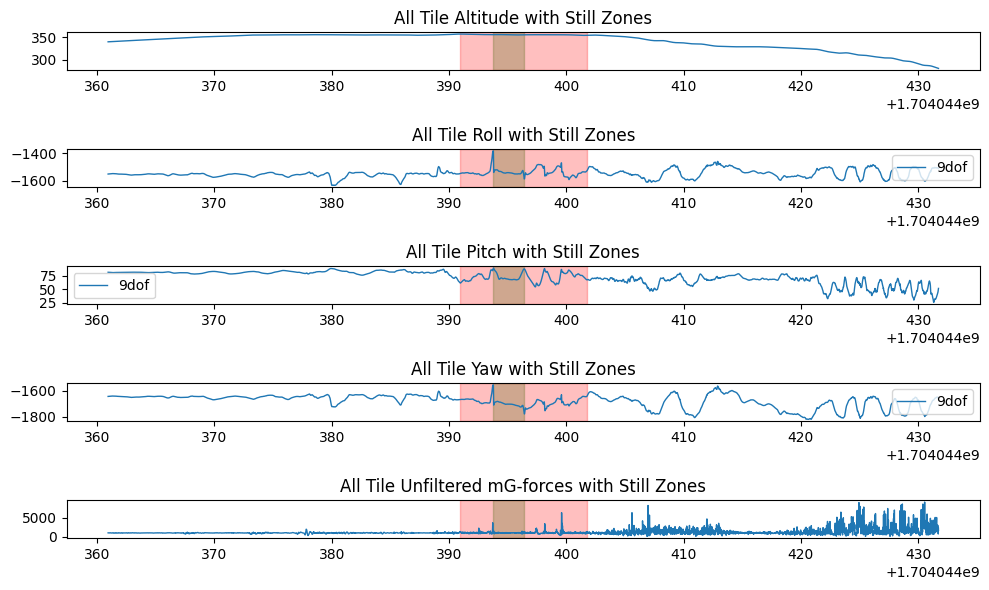

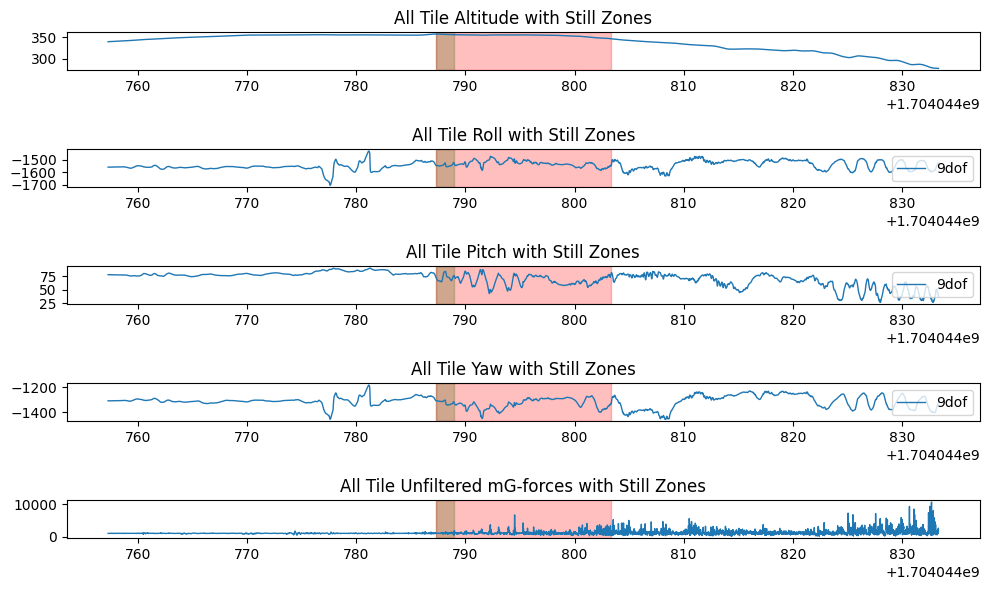

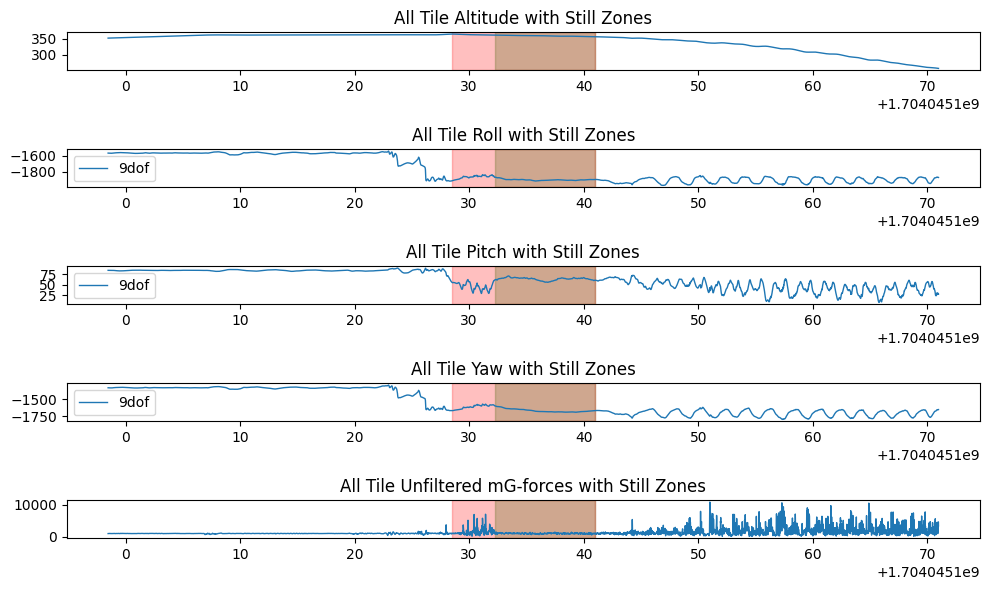

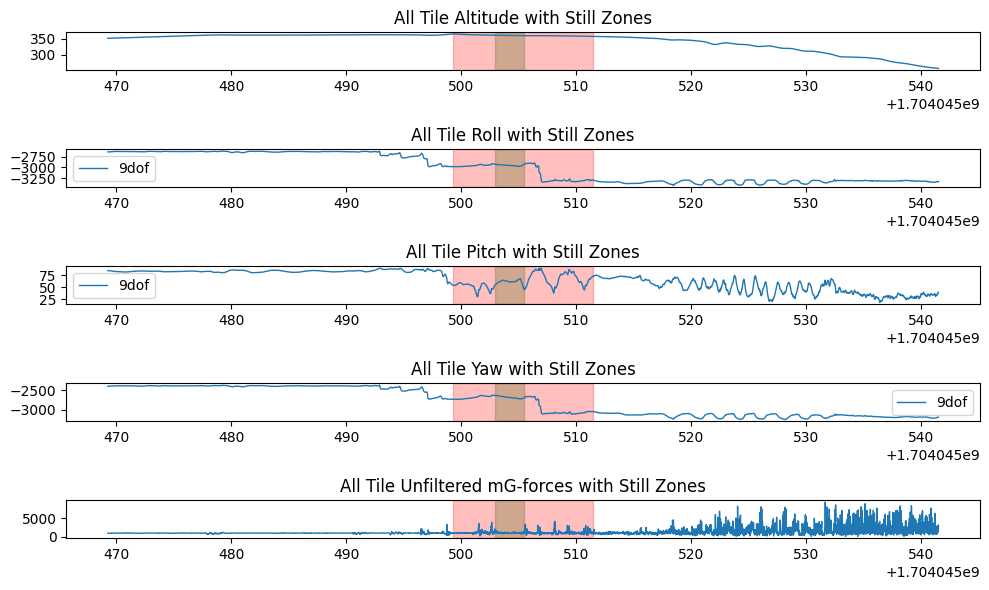

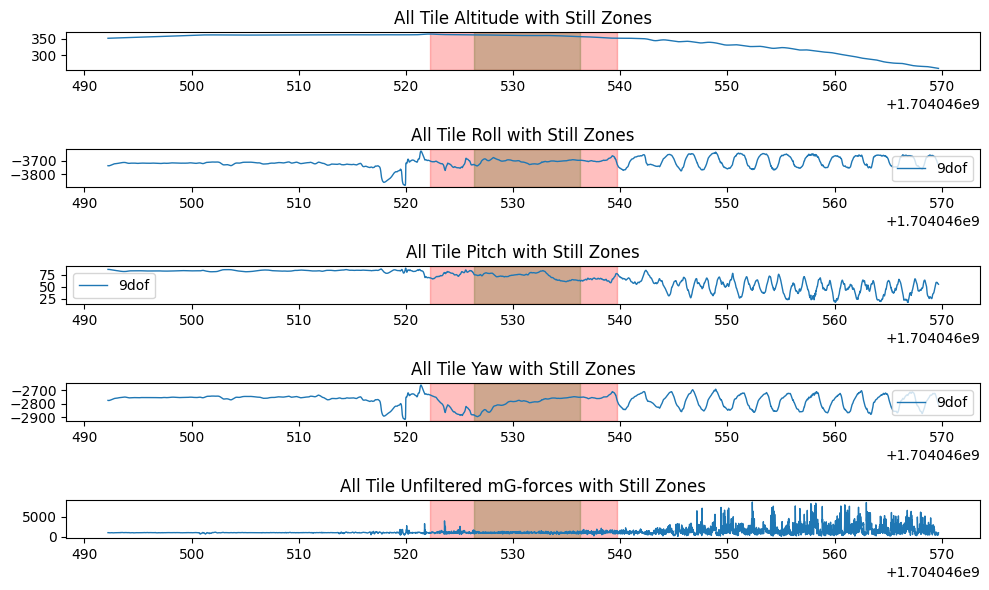

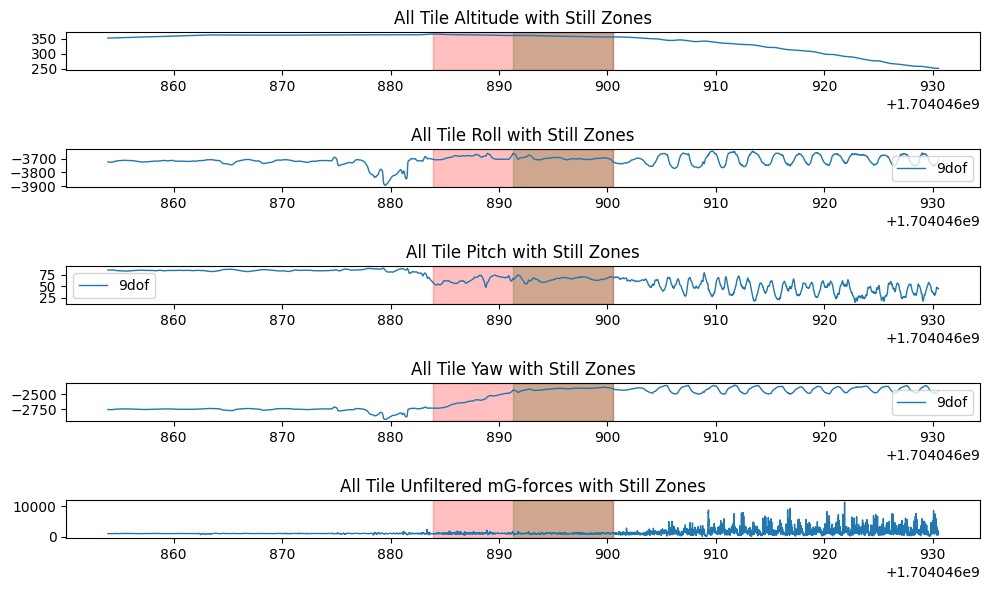

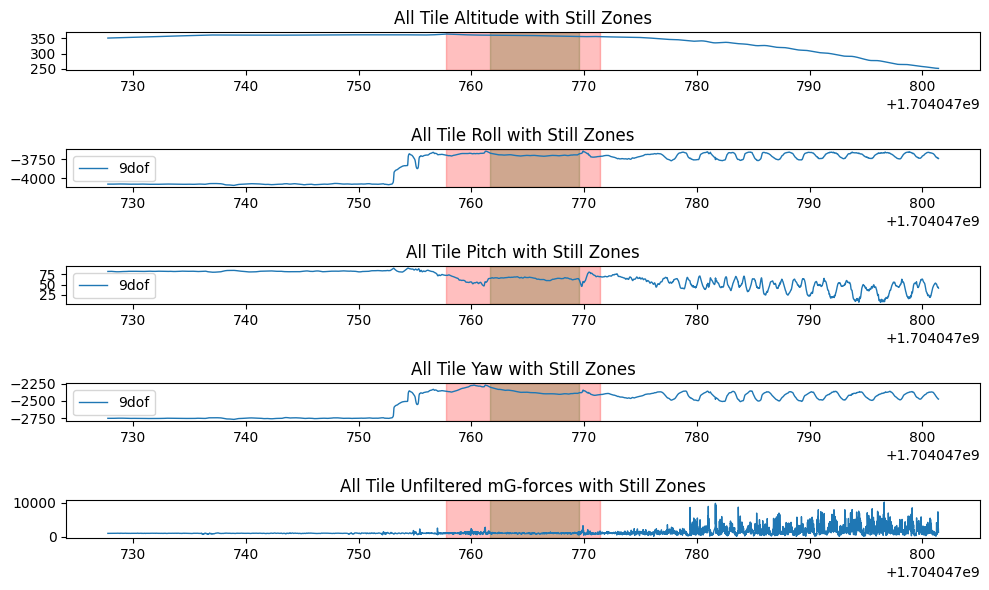

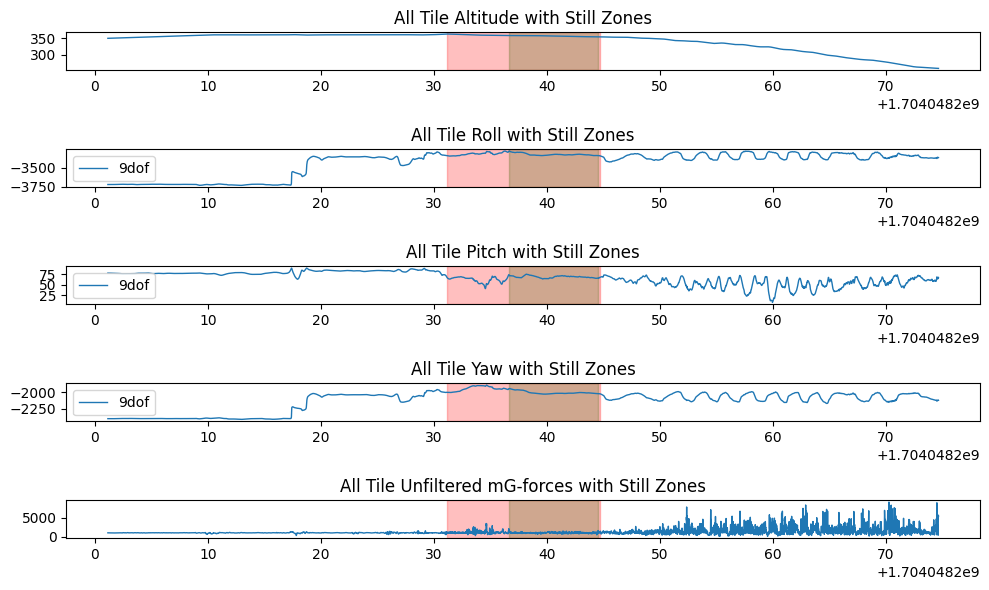

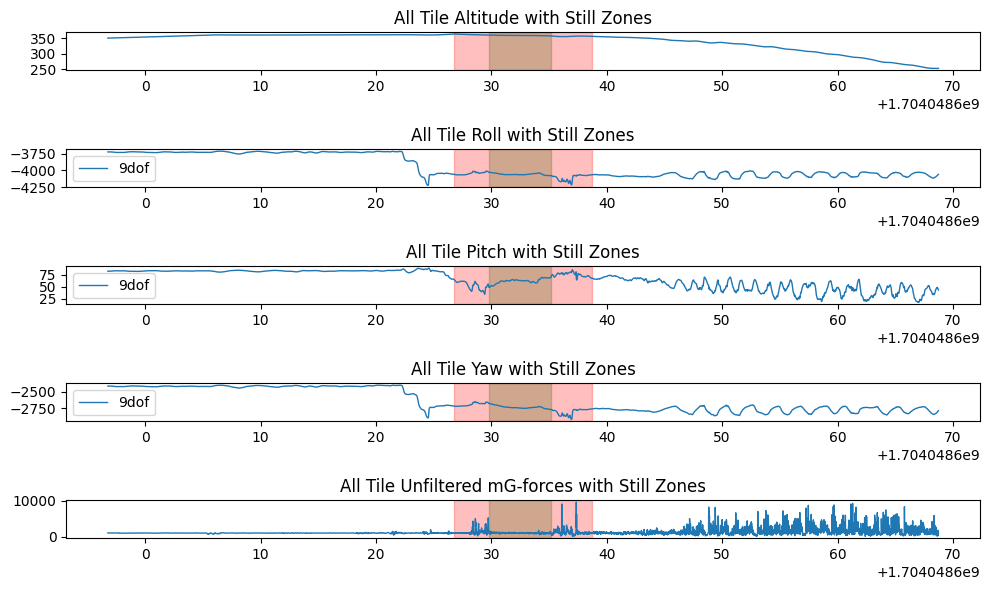

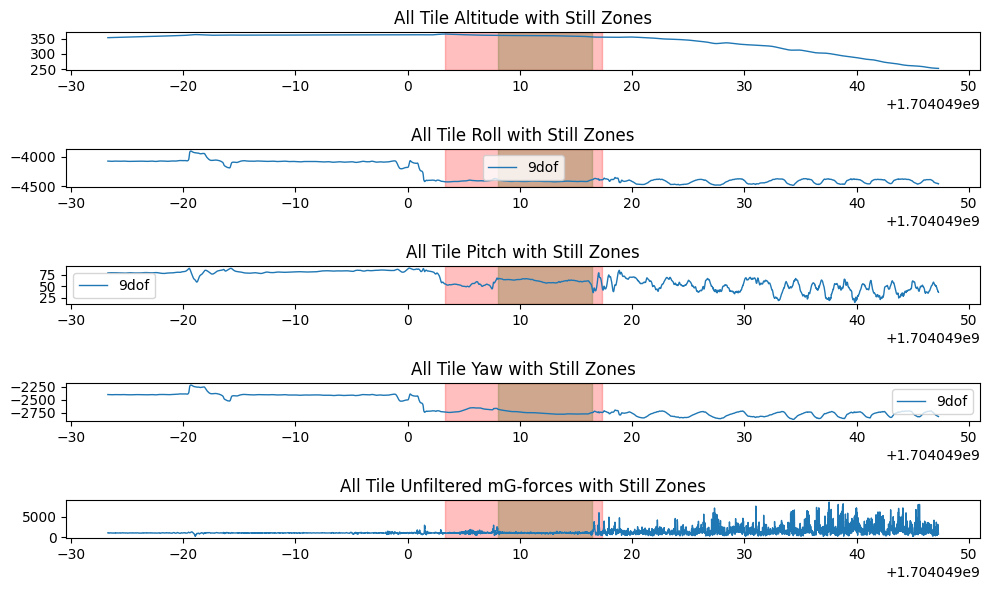

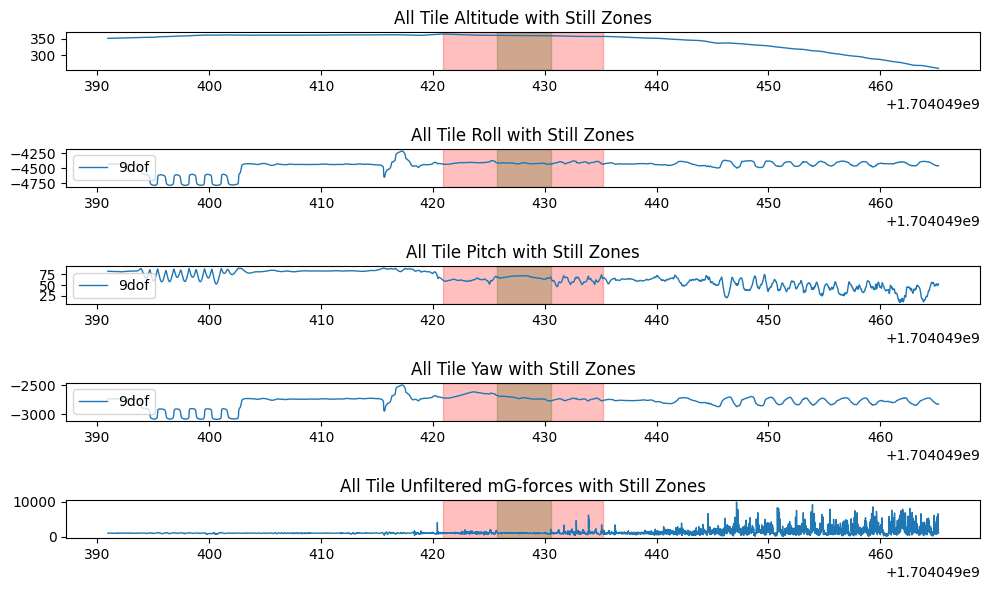

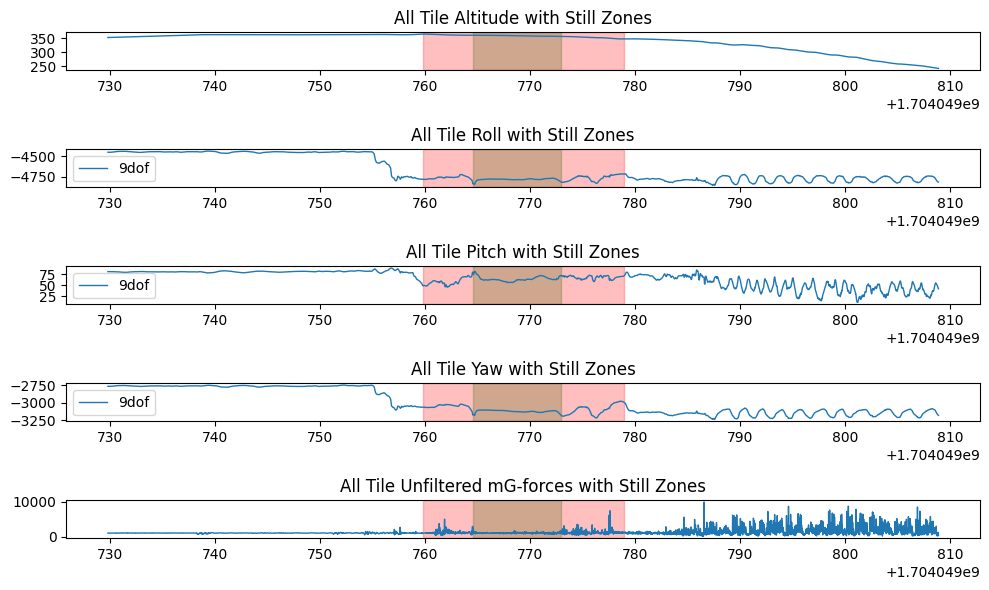

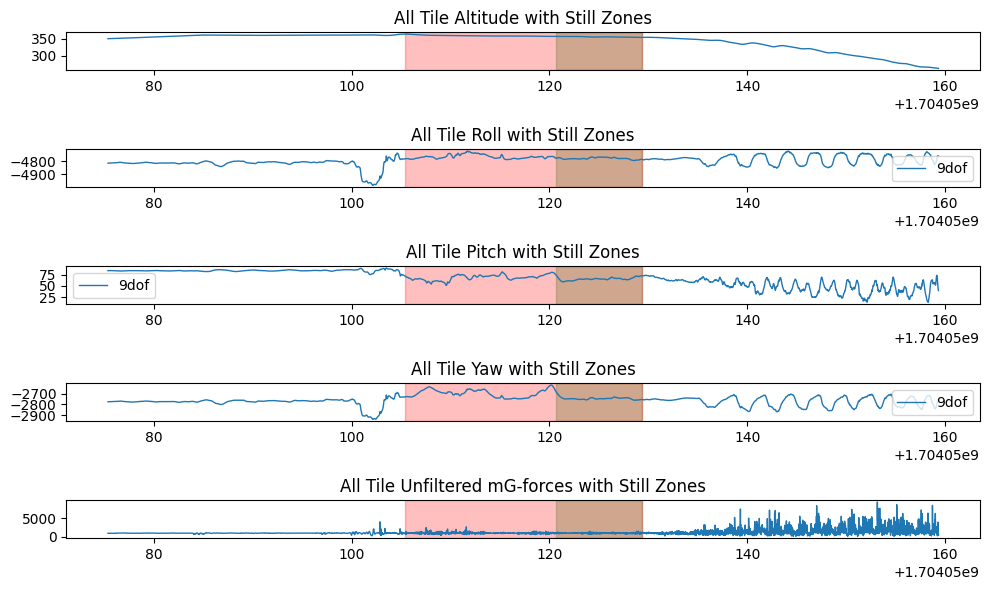

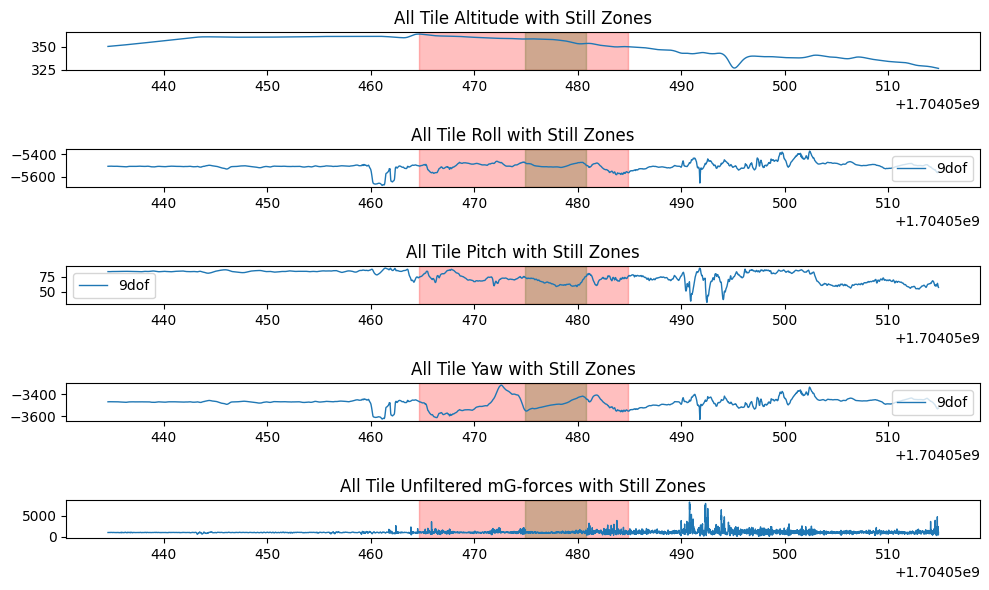

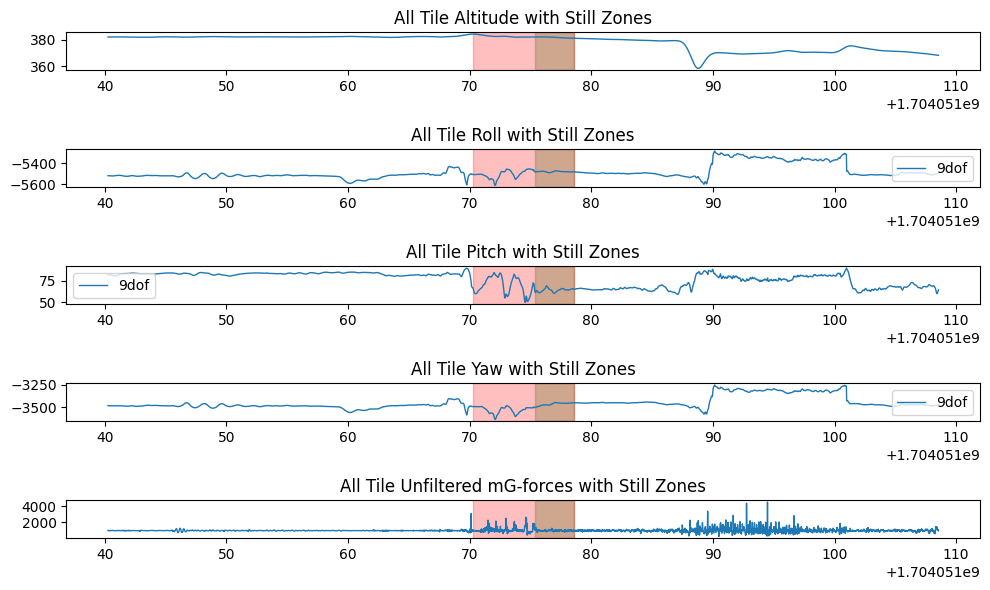

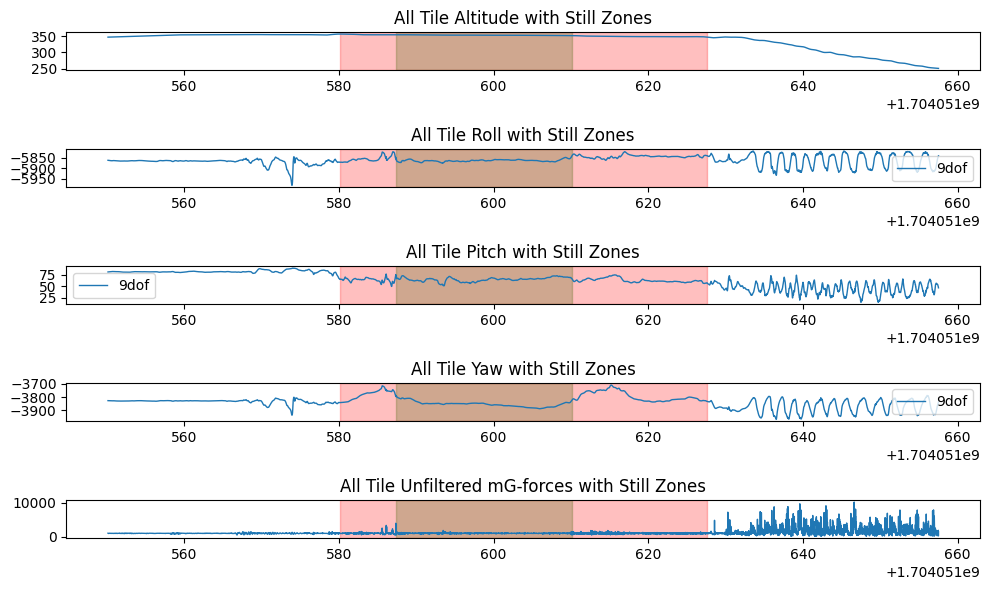

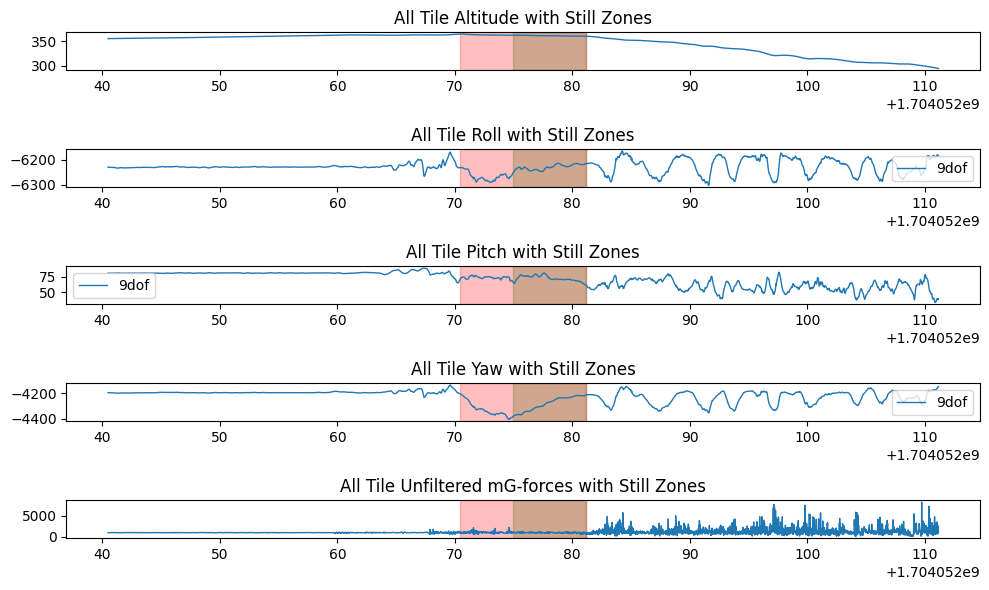

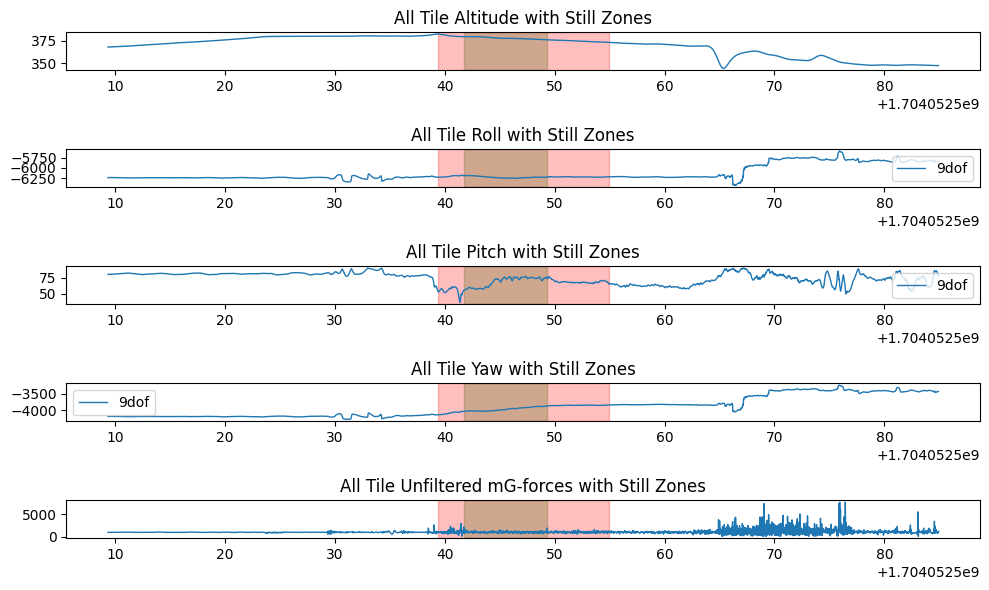

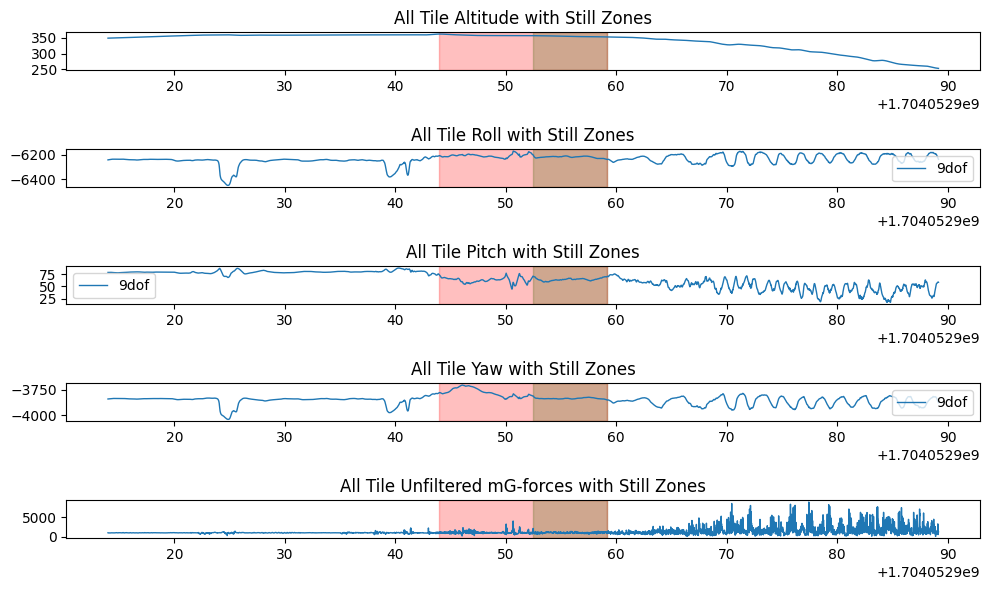

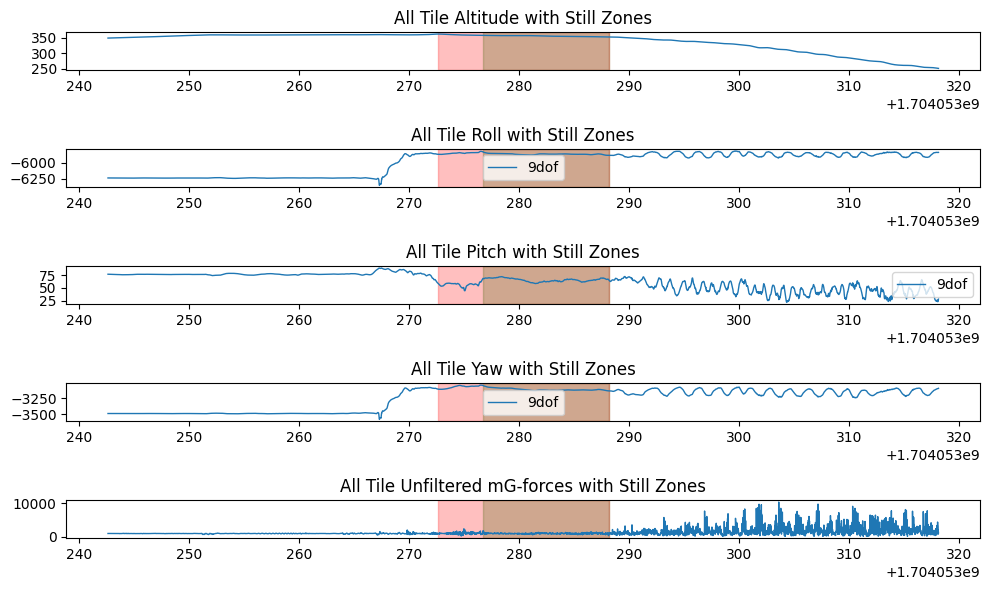

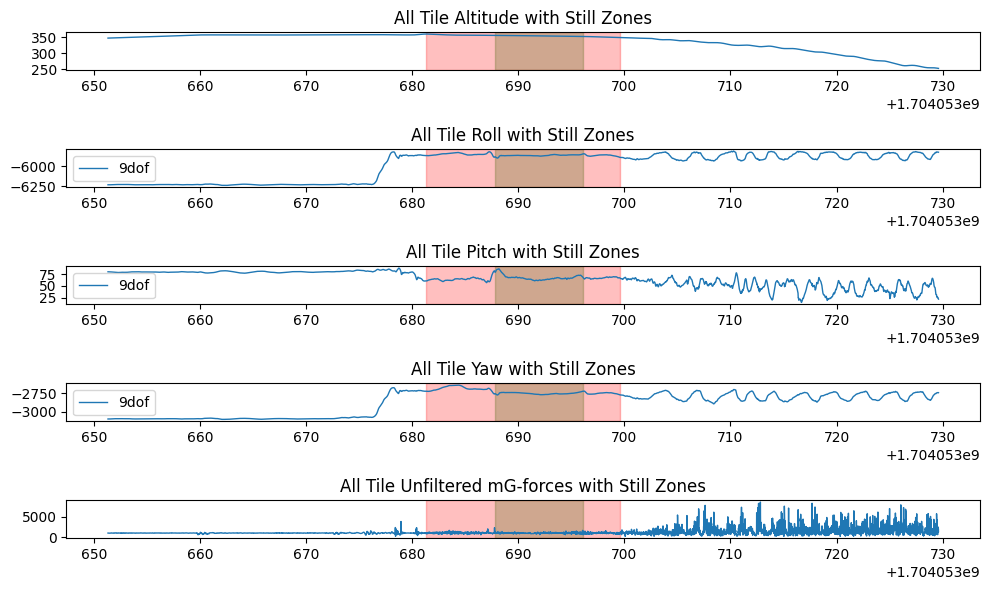

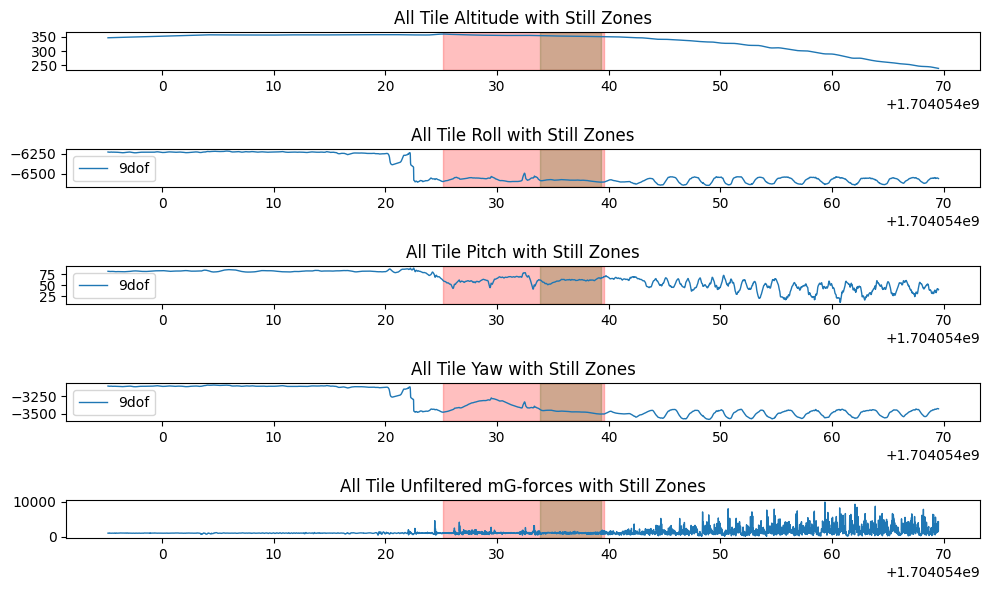

In [4]:
plotAllTileRegistationZones(session_2023_12_31.tile)

In [5]:
from quat import quatToEuler

print('Avg Euler:')
_ = [print(quatToEuler(reg.avg_quat)) for reg in session_2023_12_31.tile.static_registration.registrations if reg is not None]

Avg Euler:
[-107.73179278   68.0745823   131.86525756]
[-99.59559832  65.02673905 125.40739292]
[-100.46629572   71.03758516  154.73356236]
[-100.14798652   62.81588875  117.49232107]
[-106.04781167   71.92082374  116.44779012]
[-103.98198598   61.52384574  114.46584724]
[-93.09524785  65.06285525 144.5475365 ]
[-106.7332103    67.57468939  128.89930145]
[-104.53952231   61.23637092  155.60839641]
[-101.84480603   73.14628365   95.80261842]
[-107.1268631    71.76951043  117.71592134]
[-99.12999329  64.35685193 134.52849354]
[ -73.27062795   62.53468462 -156.20974549]
[ -95.2291522    65.6711603  -144.52344482]
[-99.81189299  63.29911691 124.9067208 ]
[-101.51861218   72.87093933   91.52350029]
[-97.15271199  65.25058058 112.48304923]
[-103.66223026   64.39772336  119.7382533 ]
[-98.52288067  65.52492636 146.53150356]
[-87.93766216  69.73726352 154.75843948]
[-94.25731104  63.0755103  149.26465816]
[-97.91946836  61.77492714 127.8563434 ]
[-98.72994816  69.16250111 157.94826351]
[-103.9